In [2]:
import numpy as np
import os
import PIL.Image
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [3]:
print(tf.__version__)

2.3.0


### Read the Images 

In [4]:
import pathlib
dataset_url = "https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria/download/"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='cell_images',
                                   untar=True,
                                   archive_format='zip')

In [5]:
data_dir = pathlib.Path(data_dir)

In [6]:
print(data_dir)

C:\Users\Sandip\.keras\datasets\cell_images


In [7]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

27658


### Preprocessing of the data.

* Exploring the dataset
* Numbers of Parasitized images are same as  Uninfected images.[ Balenced data ]

In [8]:
Parasitized = len(list(data_dir.glob('Parasitized/*')))
print(Parasitized)

13780


In [9]:
Uninfected = len(list(data_dir.glob('Uninfected/*')))
print(Uninfected)

13780


### Print some sample images from the dataset

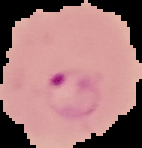

In [10]:
Parasitized = list(data_dir.glob('Parasitized/*'))
PIL.Image.open(str(Parasitized[0]))

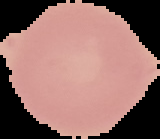

In [11]:
Uninfected = list(data_dir.glob('Uninfected/*'))
PIL.Image.open(str(Uninfected[0]))

In [12]:
print(np.array(PIL.Image.open(str(Uninfected[0]))).shape)

(139, 160, 3)


### Convert Images into Gray Scale 

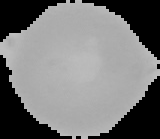

In [13]:
import PIL.ImageOps
PIL.ImageOps.grayscale(PIL.Image.open(str(Uninfected[0]))) 

In [14]:
print(f'SHAPE OF TRAINING IMAGE DATA : {np.array(PIL.ImageOps.grayscale(PIL.Image.open(str(Uninfected[0])))).shape}')

SHAPE OF TRAINING IMAGE DATA : (139, 160)


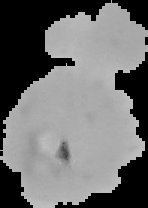

In [15]:
img = PIL.ImageOps.grayscale(PIL.Image.open(str(Parasitized[1]))) 
img

In [16]:
print(f'SHAPE OF TRAINING IMAGE DATA : {np.array(img).shape}')

SHAPE OF TRAINING IMAGE DATA : (208, 148)


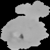

In [17]:
img = PIL.ImageOps.grayscale(PIL.Image.open(str(Parasitized[1])))  
img_resize = img.resize((50, 50))
img_resize

In [18]:
print(f'SHAPE OF TRAINING IMAGE DATA : {np.array(img_resize).shape}')

SHAPE OF TRAINING IMAGE DATA : (50, 50)


In [21]:
img_array = img_to_array(img_resize)
print(f'SHAPE OF TRAINING IMAGE DATA : {np.array(img_array).shape}')

SHAPE OF TRAINING IMAGE DATA : (50, 50, 1)


In [20]:
import matplotlib.pyplot as plt 
import os
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [22]:
data = []
labels = []
for img in Parasitized:
    try:
        img = PIL.ImageOps.grayscale(PIL.Image.open(img))
        img_resize = img.resize((50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in Uninfected:
    try:
        img = PIL.ImageOps.grayscale(PIL.Image.open(img))
        #img = img.convert('L')
        img_resize = img.resize((50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

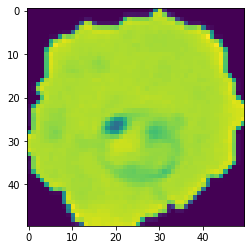

In [23]:
plt.imshow(data[0])
plt.show()

In [24]:
image_data = np.array(data)
labels = np.array(labels)

In [25]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.3, random_state = 101)

In [27]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [28]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (19290, 50, 50, 1)
SHAPE OF TESTING IMAGE DATA : (8268, 50, 50, 1)
SHAPE OF TRAINING LABELS : (19290, 2)
SHAPE OF TESTING LABELS : (8268, 2)


In [29]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D, MaxPooling1D, AveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [30]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    #model.add(Dropout(0.2))

    model.add(Conv2D(16, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    #model.add(Dropout(0.2))

    model.add(Conv2D(8, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    #model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    #model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [31]:
#instantiate the model
height = 50
width = 50
classes = 2
channels = 1
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 8)           1

In [32]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [38]:
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
603/603 [==============================] - 32s 53ms/step - loss: 0.3678 - accuracy: 0.8453
Epoch 2/20
603/603 [==============================] - 32s 53ms/step - loss: 0.2058 - accuracy: 0.9190
Epoch 3/20
603/603 [==============================] - 31s 51ms/step - loss: 0.1764 - accuracy: 0.9364
Epoch 4/20
603/603 [==============================] - 32s 53ms/step - loss: 0.1635 - accuracy: 0.9392
Epoch 5/20
603/603 [==============================] - 32s 53ms/step - loss: 0.1471 - accuracy: 0.9452
Epoch 6/20
603/603 [==============================] - 34s 57ms/step - loss: 0.1426 - accuracy: 0.9488
Epoch 7/20
603/603 [==============================] - 33s 55ms/step - loss: 0.1358 - accuracy: 0.9514
Epoch 8/20
603/603 [==============================] - 31s 51ms/step - loss: 0.1285 - accuracy: 0.9532
Epoch 9/20
603/603 [==============================] - 31s 52ms/step - loss: 0.1240 - accuracy: 0.9551
Epoch 10/20
603/603 [==============================] - 32s 54ms/step - loss: 0.119

In [39]:
model.save('Maleria_Greyscale_Final.h5')

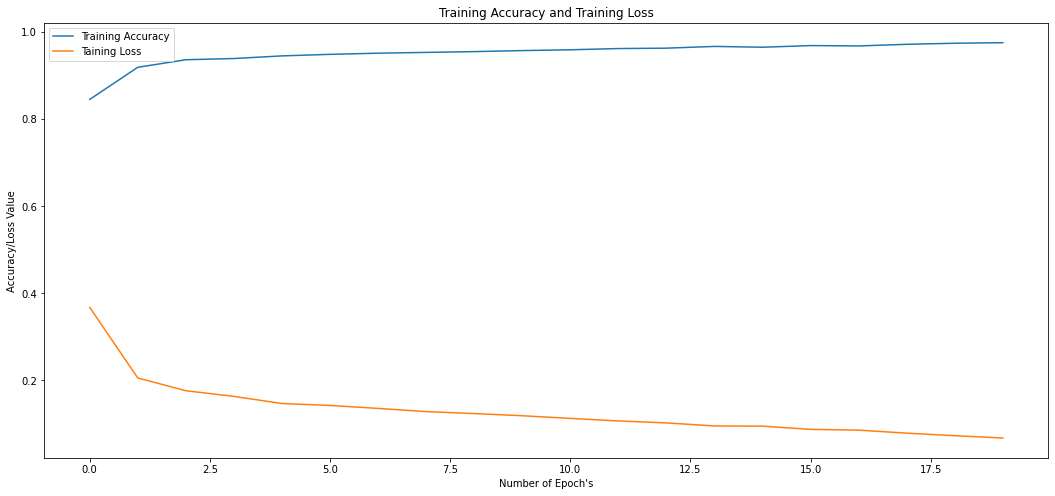

In [40]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

### Confusion Matrix 

In [50]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(x_test)
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

array([[3971,  245],
       [ 240, 3812]], dtype=int64)

* Details of Predicted and Actual 
<img src="Confusion.png">

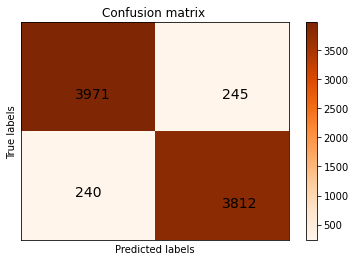

In [90]:
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

plt.imshow(cm, cmap=plt.cm.Oranges, interpolation ='none', aspect = 'auto')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.text(-0.1, 0.2, cm[0][0], fontsize=14)
plt.text(-0.1, 1.1, cm[1][0], fontsize=14)
plt.text(1.0, 0.2,  cm[0][1], fontsize=14)
plt.text(1.0, 1.2,  cm[1][1], fontsize=14)
plt.colorbar()
plt.show()

In [46]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

0.9413401064344461

In [47]:
# Recall
from sklearn.metrics import recall_score
recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average=None)

array([0.94188805, 0.94076999])

In [48]:
# Precision
from sklearn.metrics import precision_score
precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average=None)

array([0.94300641, 0.93961055])

In [51]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4216
           1       0.94      0.94      0.94      4052

    accuracy                           0.94      8268
   macro avg       0.94      0.94      0.94      8268
weighted avg       0.94      0.94      0.94      8268

